In [1]:
library(ggplot2)
library(data.table)
theme_set(theme_bw())

Warning message:
“package ‘ggplot2’ was built under R version 4.2.3”
Warning message:
“package ‘data.table’ was built under R version 4.2.3”


In [8]:
tools = c('singlem', 'metaphlan', 'motus', 'kraken', 'sourmash', 'kaiju', 'map2b', 'metabuli')
# Tools that do not have the correct taxonomy are tested only at the domain level. eg. Kaiju has NCBI taxonomy and MAP2B uses GTDB v202
correct_taxonomy_tools = c('singlem', 'metaphlan', 'kraken', 'sourmash', 'metabuli')

publication_names = data.table(
    tool = tools,
    publication_name = c('SingleM', 'MetaPhlAn', 'mOTUs', 'Kraken2', 'sourmash', 'Kaiju', 'MAP2B', 'Metabuli')
)
name_to_publication_name = function(names, correct_taxonomy_only=F){
    to_return = c()
    for (name in names){
        to_return = c(to_return, publication_names[tool==name]$publication_name)
    }
    if (correct_taxonomy_only){
        return(factor(to_return, levels=publication_names[tool %in% correct_taxonomy_tools]$publication_name))
    } else {
        return(factor(to_return, levels=publication_names$publication_name))
    }
}

In [9]:
paste('marine',0:4,sep='')

[1] "marine0" "marine1" "marine2" "marine3" "marine4"

In [10]:


d1 = data.table(expand.grid(tool=correct_taxonomy_tools, sample=paste('marine',0:4,sep=''), known=c(0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100)))
d1[, method := 'relabund']
d1[tool=='kraken', method := 'reads_wise']
d1[tool=='kaiju', method := 'reads_wise']
d1[tool=='metabuli', method := 'reads_wise']
d1[1:3]

tool,sample,known,method
<fct>,<fct>,<dbl>,<chr>
singlem,marine0,0,relabund
metaphlan,marine0,0,relabund
kraken,marine0,0,reads_wise


In [11]:
# df = pl.read_csv('output_*/opal/known*/*.opal_report')
d2 = d1[, fread(paste('output_',tool,sep='','/opal/known',known,'/',sample,'.opal_report')), by=list(tool,sample,known)]
d2[1:3]

tool,sample,known,tool,rank,metric,sample,value
<fct>,<fct>,<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>
singlem,marine0,0,Gold standard,kingdom,Bray-Curtis distance,SAMPLEID,0
singlem,marine0,0,Gold standard,phylum,Bray-Curtis distance,SAMPLEID,0
singlem,marine0,0,Gold standard,class,Bray-Curtis distance,SAMPLEID,0


In [12]:
setnames(d2, c('tool','sample','known','blah','rank','metric','sample','value'))
d3 = d2[blah != 'Gold standard'][,.(tool, sample, known, rank, metric, value)]

In [13]:
bc = d3[metric=='Bray-Curtis distance']
dim(bc)
bc[1:10]

[1] 1925    6

tool,sample,known,rank,metric,value
<fct>,<fct>,<dbl>,<chr>,<chr>,<dbl>
singlem,marine0,0,kingdom,Bray-Curtis distance,0.001310343
singlem,marine0,0,phylum,Bray-Curtis distance,0.026749358
singlem,marine0,0,class,Bray-Curtis distance,0.030016100
singlem,marine0,0,order,Bray-Curtis distance,0.046673983
singlem,marine0,0,family,Bray-Curtis distance,0.055370860
singlem,marine0,0,genus,Bray-Curtis distance,0.071531396
singlem,marine0,0,species,Bray-Curtis distance,0.174898998
metaphlan,marine0,0,kingdom,Bray-Curtis distance,0.000000000
metaphlan,marine0,0,phylum,Bray-Curtis distance,0.126799399


In [14]:
bc_medians = bc[,.(median=median(value)), by=.(tool, known, rank)]
bc_medians[1:10]

tool,known,rank,median
<fct>,<dbl>,<chr>,<dbl>
singlem,0,kingdom,0.002091268
singlem,0,phylum,0.030167189
singlem,0,class,0.034641339
singlem,0,order,0.058507962
singlem,0,family,0.066724146
singlem,0,genus,0.078407726
singlem,0,species,0.174898998
metaphlan,0,kingdom,0.000000000
metaphlan,0,phylum,0.083437213


Warning message:
“`qplot()` was deprecated in ggplot2 3.4.0.”


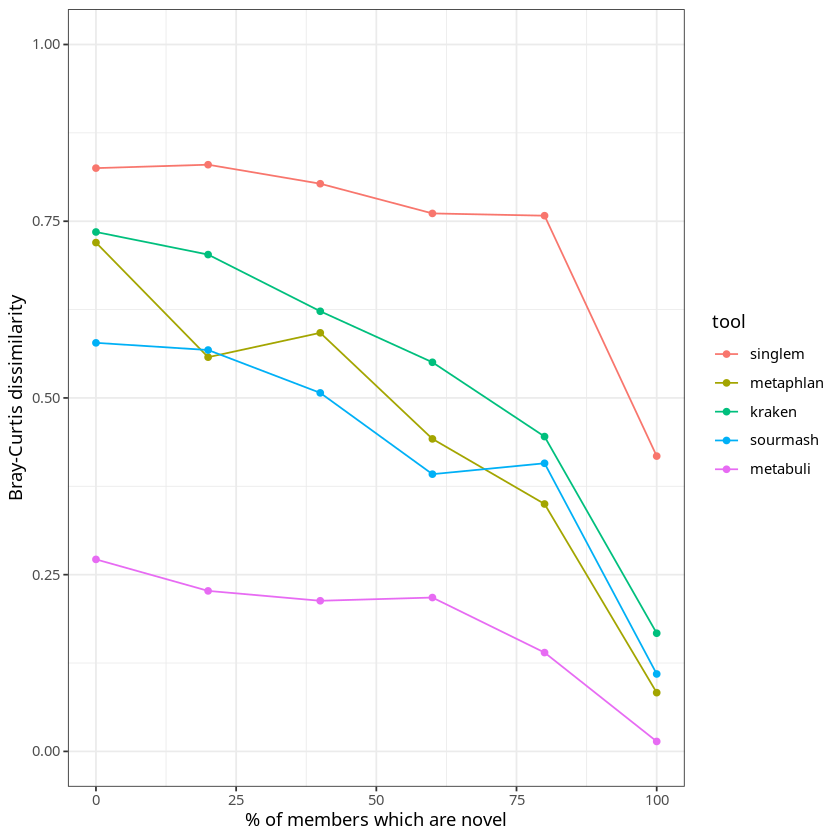

In [15]:

qplot(data=bc_medians[rank=='species' & tool %in% correct_taxonomy_tools & known %in% c(0,20,40,60,80,100)], known, 1-median, colour=tool)+geom_line()+ylab('Bray-Curtis dissimilarity')+xlab('% of members which are novel')+ylim(0,1)

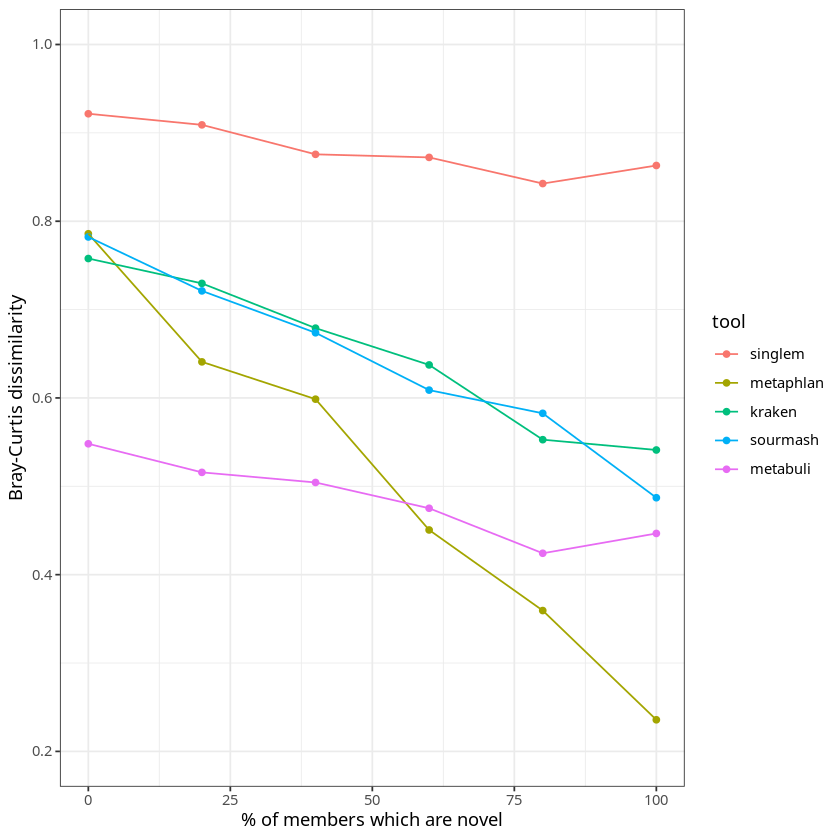

In [16]:
# no legend
# qplot(data=bc_medians[rank=='genus' & tool %in% correct_taxonomy_tools], known, 1-median, colour=tool)+geom_line()+ylab('Bray-Curtis dissimilarity')+xlab('% of members which are novel')+ylim(0.2,1)
qplot(data=bc_medians[rank=='genus' & tool %in% correct_taxonomy_tools & known %in% c(0,20,40,60,80,100)], known, 1-median, colour=tool)+geom_line()+ylab('Bray-Curtis dissimilarity')+xlab('% of members which are novel')+ylim(0.2,1)

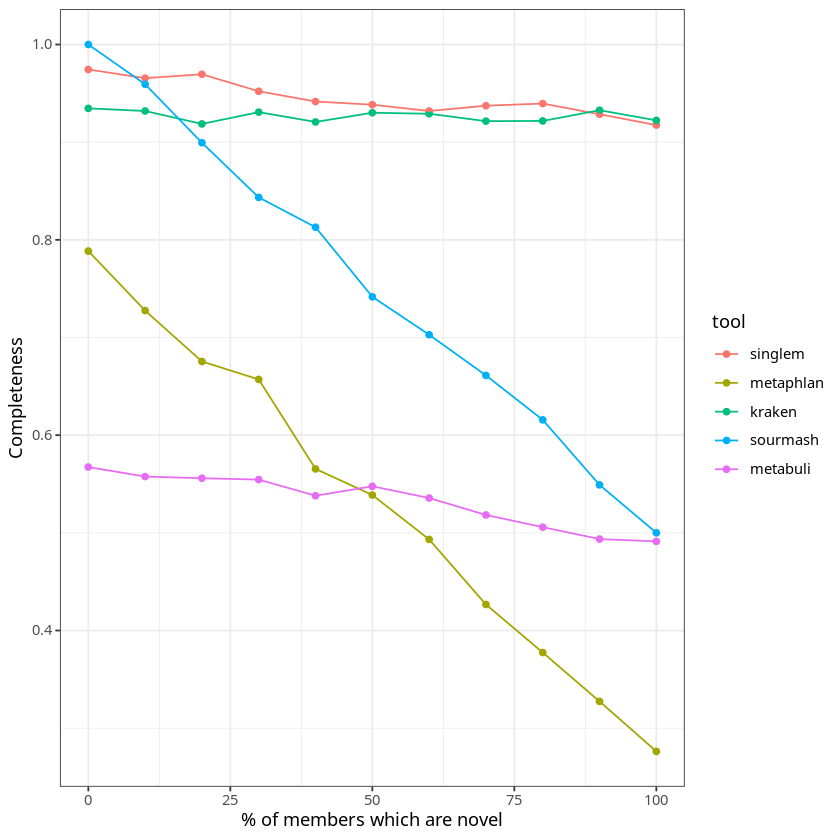

In [17]:
qplot(data=d3[metric=='Completeness'][,.(median=median(value)), by=.(tool, known, rank)][rank=='genus' & tool %in% correct_taxonomy_tools], known, median, colour=tool)+geom_line()+ylab('Completeness')+xlab('% of members which are novel')

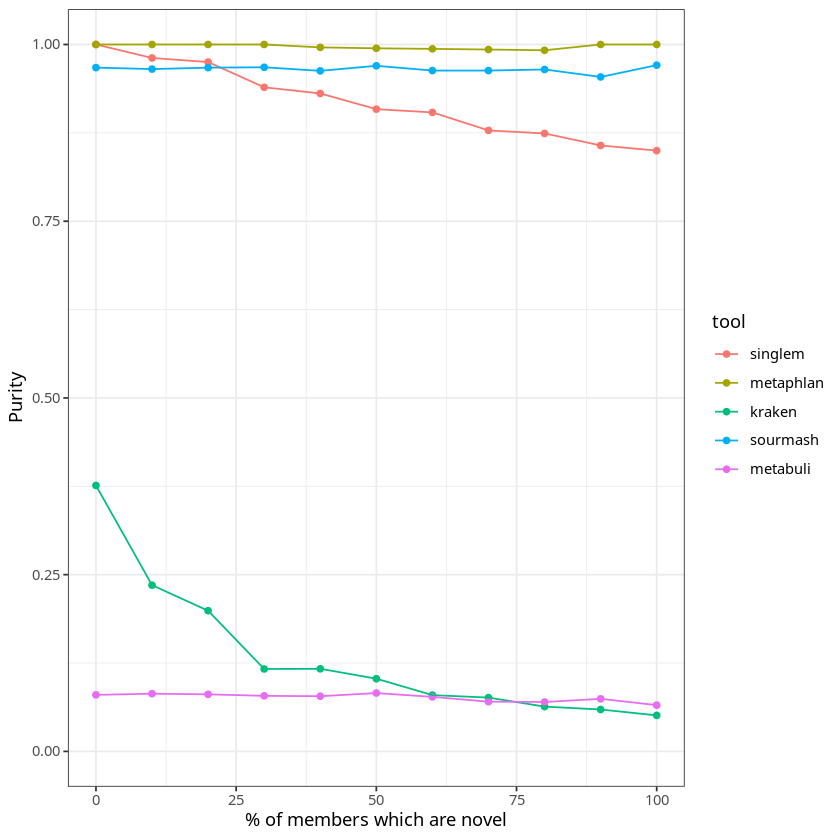

In [18]:
qplot(data=d3[metric=='Purity'][,.(median=median(value)), by=.(tool, known, rank)][rank=='genus' & tool %in% correct_taxonomy_tools], known, median, colour=tool)+geom_line()+ylab('Purity')+xlab('% of members which are novel')+ylim(0,1)

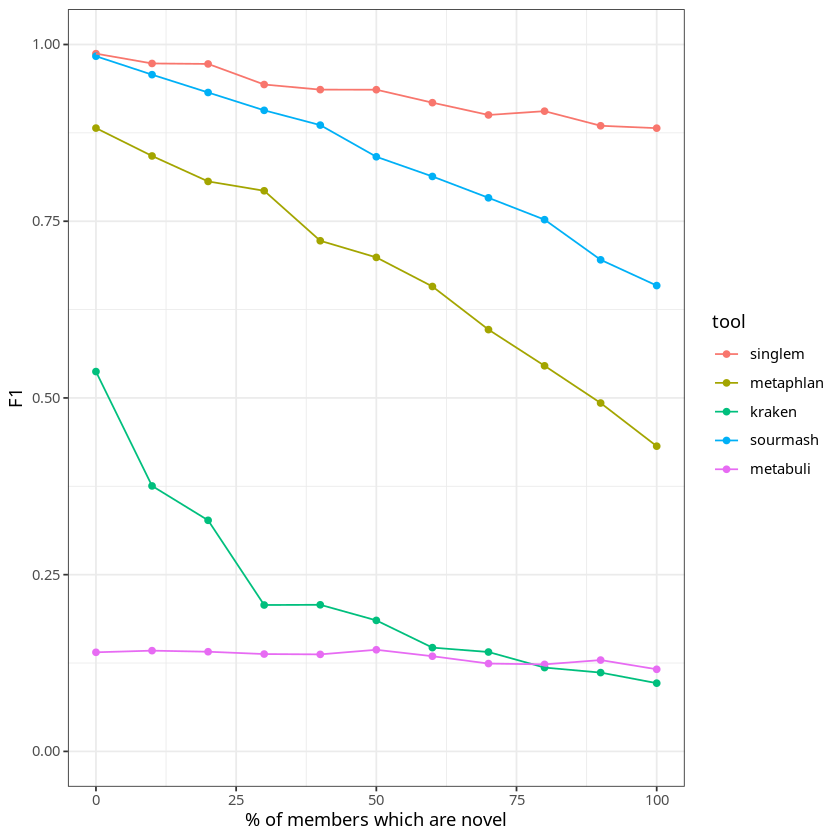

In [19]:
qplot(data=d3[metric=='F1 score'][,.(median=median(value)), by=.(tool, known, rank)][rank=='genus' & tool %in% correct_taxonomy_tools], known, median, colour=tool)+geom_line()+ylab('F1')+xlab('% of members which are novel')+ylim(0,1)

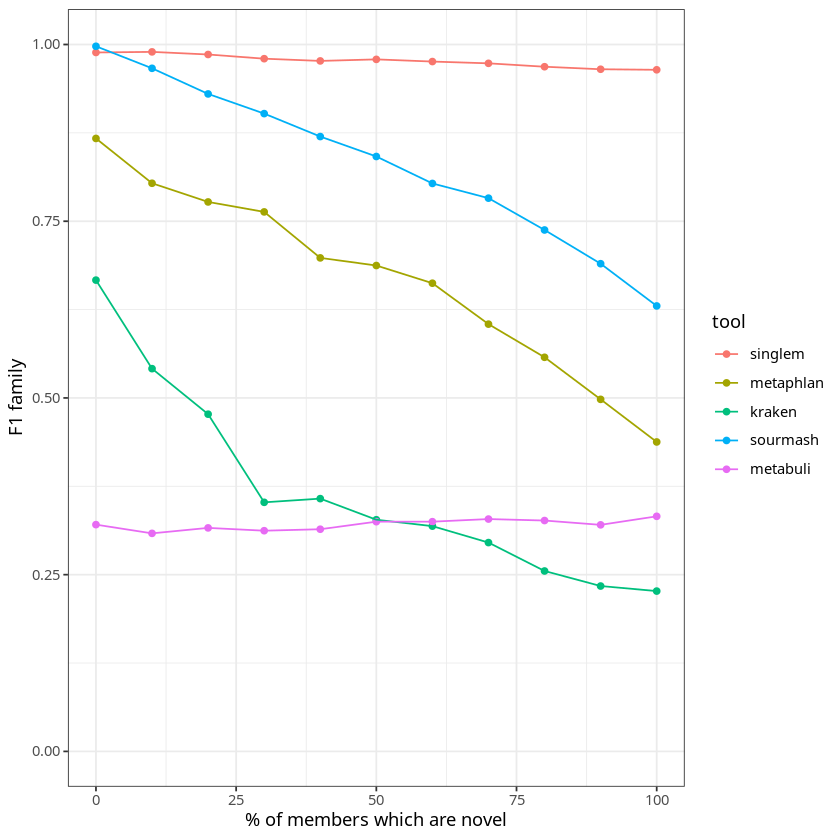

In [20]:
qplot(data=d3[metric=='F1 score'][,.(median=median(value)), by=.(tool, known, rank)][rank=='family' & tool %in% correct_taxonomy_tools], known, median, colour=tool)+geom_line()+ylab('F1 family')+xlab('% of members which are novel')+ylim(0,1)